<a href="https://colab.research.google.com/github/spatank/CIS-522/blob/main/Tutorials/W9_Tutorial1_SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS-522 Week 9 Part 1
# Introduction to Recurrent Neural Networks (RNNs)

__Instructor__: Lyle Ungar

__Content creators:__ Anushree Hede, Pooja Consul

---

Video available at https://youtube.com/watch?v=vSPUeMd6sy4


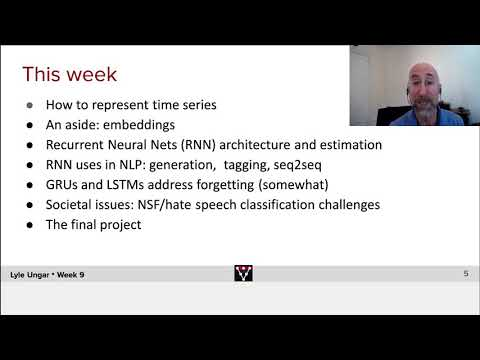

In [1]:
#@title Video: Intro
import time
try: t0;
except NameError: t0=time.time()

from IPython.display import YouTubeVideo
video = YouTubeVideo(id="vSPUeMd6sy4", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

In [ ]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'spatank1' #@param {type:"string"}
my_pod = 'sublime-newt' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','astute-jellyfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion']


## Recap the experience from last week

What did you learn last week. What questions do you have? [15 min discussion]

In [2]:
learning_from_previous_week = 'Last week we learned about generative methods such as the variational autoencoder and GANs. I really enjoyed that module and would love to see how Bayesian methods are applied more broadly in different domains.' #@param {type:"string"}

*Estimated time: 20 minutes since start*

---
# Setup

In [3]:
# imports

!pip install --upgrade gensim
!pip install torchtext==0.4.0
!pip install unidecode
!pip install d2l

import re
import os
import sys
import math
import time
import nltk
import torch
import random
import string
import unidecode
import collections

import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from gensim.models import Word2Vec
from nltk.corpus import brown
from sklearn.manifold import TSNE
from torch.autograd import Variable
from torchtext import data, datasets
from torchtext.vocab import Vectors

from IPython.display import Image, YouTubeVideo
from torch.nn import functional as F
from d2l import torch as d2l

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('webtext')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

     |████████████████████████████████| 24.2MB 1.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 61kB 3.3MB/s 
  Found existing installation: torchtext 0.9.0
    Uninstalling torchtext-0.9.0:
      Successfully uninstalled torchtext-0.9.0
     |████████████████████████████████| 245kB 5.5MB/s 
     |████████████████████████████████| 81kB 3.7MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


In [4]:
# @title Seeds
seed = 522
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

In [5]:
# @title Figure Settings
import ipywidgets as widgets
%matplotlib inline 
fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
%config InlineBackend.figure_format = 'retina'
SMALL_SIZE = 12

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/"
              "course-content/master/nma.mplstyle")

# plt.rcParams.update(plt.rcParamsDefault)
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

---
# Section 1: Memory

Video available at https://youtube.com/watch?v=q4XN3XIYUto


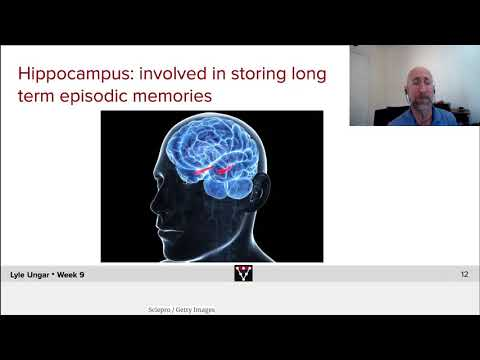

In [6]:
#@title Video: Memory
try: t1;
except NameError: t1=time.time()

video = YouTubeVideo(id="q4XN3XIYUto", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

Discuss briefly and answer below: What are examples of machine learning time series problems where standard recurrent networks are likely to perform badly due to their short memory?  How else might one address the problem of long term memory other than neural turing machines?

In [8]:
where_RNNs_fail = 'RNNs are likely to fail when the task at hand requires a long-term memory. For instance, in time series such as volcanic activity where events are really sparse, the RNN needs to have a really long memory. ' #@param {type:"string"}
alternate_long_term_memory = 'One could address the problem of long term memory by introducing attention into the RNNs.' #@param {type:"string"}

---
# Section 2: Time series with neural nets


Video available at https://youtube.com/watch?v=nVmD3uwGnTc


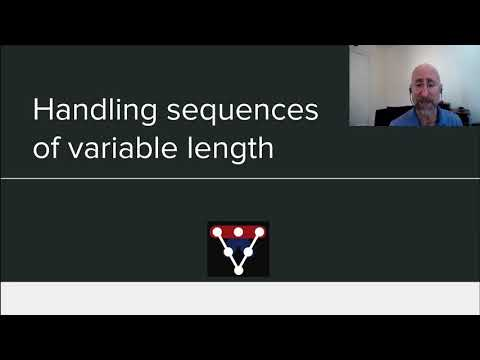

In [7]:
#@title Video: Time Series
try: t2;
except NameError: t2=time.time()

video = YouTubeVideo(id="nVmD3uwGnTc", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video


Most time series modeling mostly uses recurrent neural nets. Why?
There is an active line of research trying to replace RNNs with methods that use padding+truncation.  Why?

In [9]:
why_RNNs = 'RNNs seem to be really flexible. They are useful in any domain that is attempting to model time series data. This includes financial modeling, time series analysis, videos, etc. They can also be complemented with ideas such as attention that help mitigate their drawbacks.' #@param {type:"string"}
why_not_RNNs = 'I wonder based on watching the lecture videos if RNNs suffer from an inability to distinguish between two inputs that are embedded in the same way. For instance, using the vector embeddings for characters, it is possible that two words share the same encoding if the linear combination of their constituent character embeddings sums to the same vector. Using padding and truncation in this case may be the more suitable approach to disambiguate the two words. ' #@param {type:"string"}

*Estimated time: 40 minutes since start*

---
# Section 3: Recurrence

Video available at https://youtube.com/watch?v=XDdt2qN7PtY


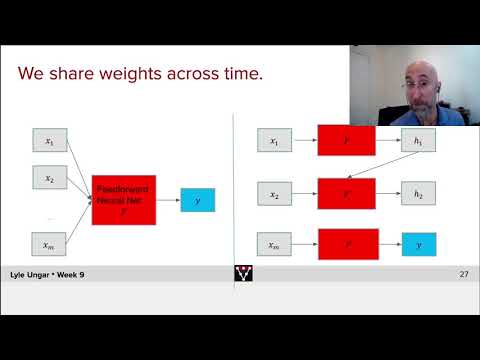

In [10]:
#@title Video: Recurrence
try: t3;
except NameError: t3=time.time()

video = YouTubeVideo(id="XDdt2qN7PtY", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

A key assumption behind RNNs is stationarity. Consider the problem of forecasting daily sales of different products (e.g. for Amazon). Is that time series stationary? What might you do (e.g., in terms of additional features) to make it more stationary?

In [11]:
creating_stationarity = "Most real-world time series are not stationary. Amazon's daily sales time series are probably very cyclic. Non-stationary time series can be approximated by stationary ones by using moving average models or difference models of arbitrary order." #@param {type:"string"}


---
# Section 4: Embeddings


Video available at https://youtube.com/watch?v=8kuWXnj7F8o


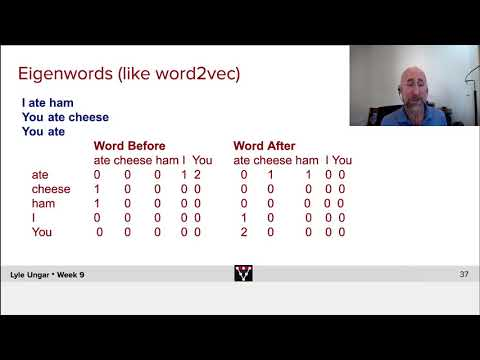

In [12]:
#@title Video: Embeddings
try: t4;
except NameError: t4=time.time()

video = YouTubeVideo(id="8kuWXnj7F8o", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

[Word2vec](https://rare-technologies.com/word2vec-tutorial/) is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, with each unique word in the corpus being assigned a corresponding vector in the space. 

## Section 4.1: Creating Word Embeddings

We will create embeddings for a subset of categories in the [Brown corpus](https://www1.essex.ac.uk/linguistics/external/clmt/w3c/corpus_ling/content/corpora/list/private/brown/brown.html).  In order to achieve this task we will use the [gensim](https://radimrehurek.com/gensim/) library to create word2vec embeddings. Gensim’s word2vec expects a sequence of sentences as its input. Each sentence is a list of words.
Calling Word2Vec(sentences, iter=1) will run two passes over the sentences iterator (or, in general iter+1 passes). The first pass collects words and their frequencies to build an internal dictionary tree structure. The second and subsequent passes train the neural model. 
Word2vec accepts several parameters that affect both training speed and quality.

One of them is for pruning the internal dictionary. Words that appear only once or twice in a billion-word corpus are probably uninteresting typos and garbage. In addition, there’s not enough data to make any meaningful training on those words, so it’s best to ignore them:

`model = Word2Vec(sentences, min_count=10)  # default value is 5`


A reasonable value for min_count is between 0-100, depending on the size of your dataset.

Another parameter is the size of the NN layers, which correspond to the “degrees” of freedom the training algorithm has:

`model = Word2Vec(sentences, size=200)  # default value is 100`


Bigger size values require more training data, but can lead to better (more accurate) models. Reasonable values are in the tens to hundreds.

The last of the major parameters (full list [here](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)) is for training parallelization, to speed up training:

`model = Word2Vec(sentences, workers=4) # default = 1 worker = no parallelization`

In [13]:
category = ['editorial', 'fiction', 'government', 'mystery', 'news', 'religion',
            'reviews', 'romance', 'science_fiction']
            # ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government',
            # 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion',
            # 'reviews', 'romance', 'science_fiction']

In [15]:
def create_word2vec_model(category = 'news', size = 50, sg = 1, min_count = 5):
  try:
    sentences = brown.sents(categories=brown.categories()) 
    model = Word2Vec(sentences, size=size, sg=sg, min_count=min_count)

  except (AttributeError, TypeError):
      raise AssertionError('Input variable "category" should be a string or list,' 
      '"size", "sg", "min_count" should be integers')

  return model

def model_dictionary(model):
  words = list(w2vmodel.wv.vocab)
  return words 

def get_embedding(word, model):
  if word in w2vmodel.wv.vocab:
    return model.wv[word]
  else:
    return None

The cell will take 30-45 seconds to run.

In [16]:
w2vmodel = create_word2vec_model(category)

You can list all the words for which embeddings are created i.e. the dictionary.

In [17]:
print(model_dictionary(w2vmodel))

['The', 'Fulton', 'County', 'Grand', 'said', 'Friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'jury', 'further', 'in', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'to', 'investigate', 'reports', 'possible', 'won', 'Allen', 'Jr.', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', "Georgia's", 'registration', 'laws', 'are', 'or', 'inadequate', 'often', 'ambiguous', 'It', 'recommended', 'legislators', 'act', 'have', 'these', 'studied', 'revised', 'end', 'improving', 'them', 'grand', 'commented', 'on', 'other', 'topics', 'among', 'purchasing', 'departments', 'well', '

You can get the embedding vector for a word in the dictionary.

In [18]:
print(get_embedding('weather', w2vmodel))

[-0.49940333 -0.01020289  0.29612222 -0.02975262 -0.3560551  -0.06505375
  0.02592719 -0.00902661 -0.1397258  -0.00606153  0.00065485 -0.44452646
 -0.06086386 -0.054003   -0.2952518  -0.106164   -0.03614953  0.11426229
  0.12135543 -0.22247931  0.1130434  -0.22150908 -0.00139271  0.08101405
  0.00229195 -0.22905307  0.05751317 -0.1335375  -0.02580834 -0.4291433
 -0.38296312  0.3988621   0.17143087 -0.3496512  -0.00917311  0.5038438
 -0.29252636 -0.12956212  0.384531   -0.00195283  0.28029615 -0.40481815
  0.2741278  -0.37352452 -0.3513487  -0.06151078  0.14225024 -0.02830348
  0.02595722 -0.03752051]


What do the embeddings mean? What do they represent?


In [20]:
word_embedding_meaning = "The embeddings are a mathematical representation of the meaning of a word in the dictionary. Here, the notion of 'meaning' is approximated by the context in which a word appears." #@param {type:"string"}

## Section 4.2: Visualizing Word Embeddings

We can now obtain the word embeddings for any word in the dictionary using word2vec. Let's visualize these embeddings to get an intuition of what these embeddings mean. The word embeddings obtained from word2vec model are in high dimensional space. We will use PCA to pick the 2 features that capture the most variance in the embeddings in order to represent them in a 2D space.


For each word in `keys`, we pick the top 10 similar words (using cosine similarity) and plot them.  

 What should be the arrangement of similar words?
 What should be arrangement of the key clusters with respect to each other?
 

In [21]:
keys = ['election', 'magic', 'love', 'God', 'evidence', 'administration', 'governments']

In [22]:
def get_cluster_embeddings(keys):
  embedding_clusters = []
  word_clusters = []

  # find closest words and add them to cluster
  for word in keys:
      embeddings = []
      words = []
      if not word in w2vmodel.wv.vocab:
        print('The word ', word, 'is not in the dictionary')
        continue

      for similar_word, _ in w2vmodel.wv.most_similar(word, topn=10):
          words.append(similar_word)
          embeddings.append(w2vmodel.wv[similar_word])
      embedding_clusters.append(embeddings)
      word_clusters.append(words)

  # get embeddings for the words in clusers
  embedding_clusters = np.array(embedding_clusters)
  n, m, k = embedding_clusters.shape
  tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
  embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
  return embeddings_en_2d, word_clusters

In [23]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc="lower left")
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

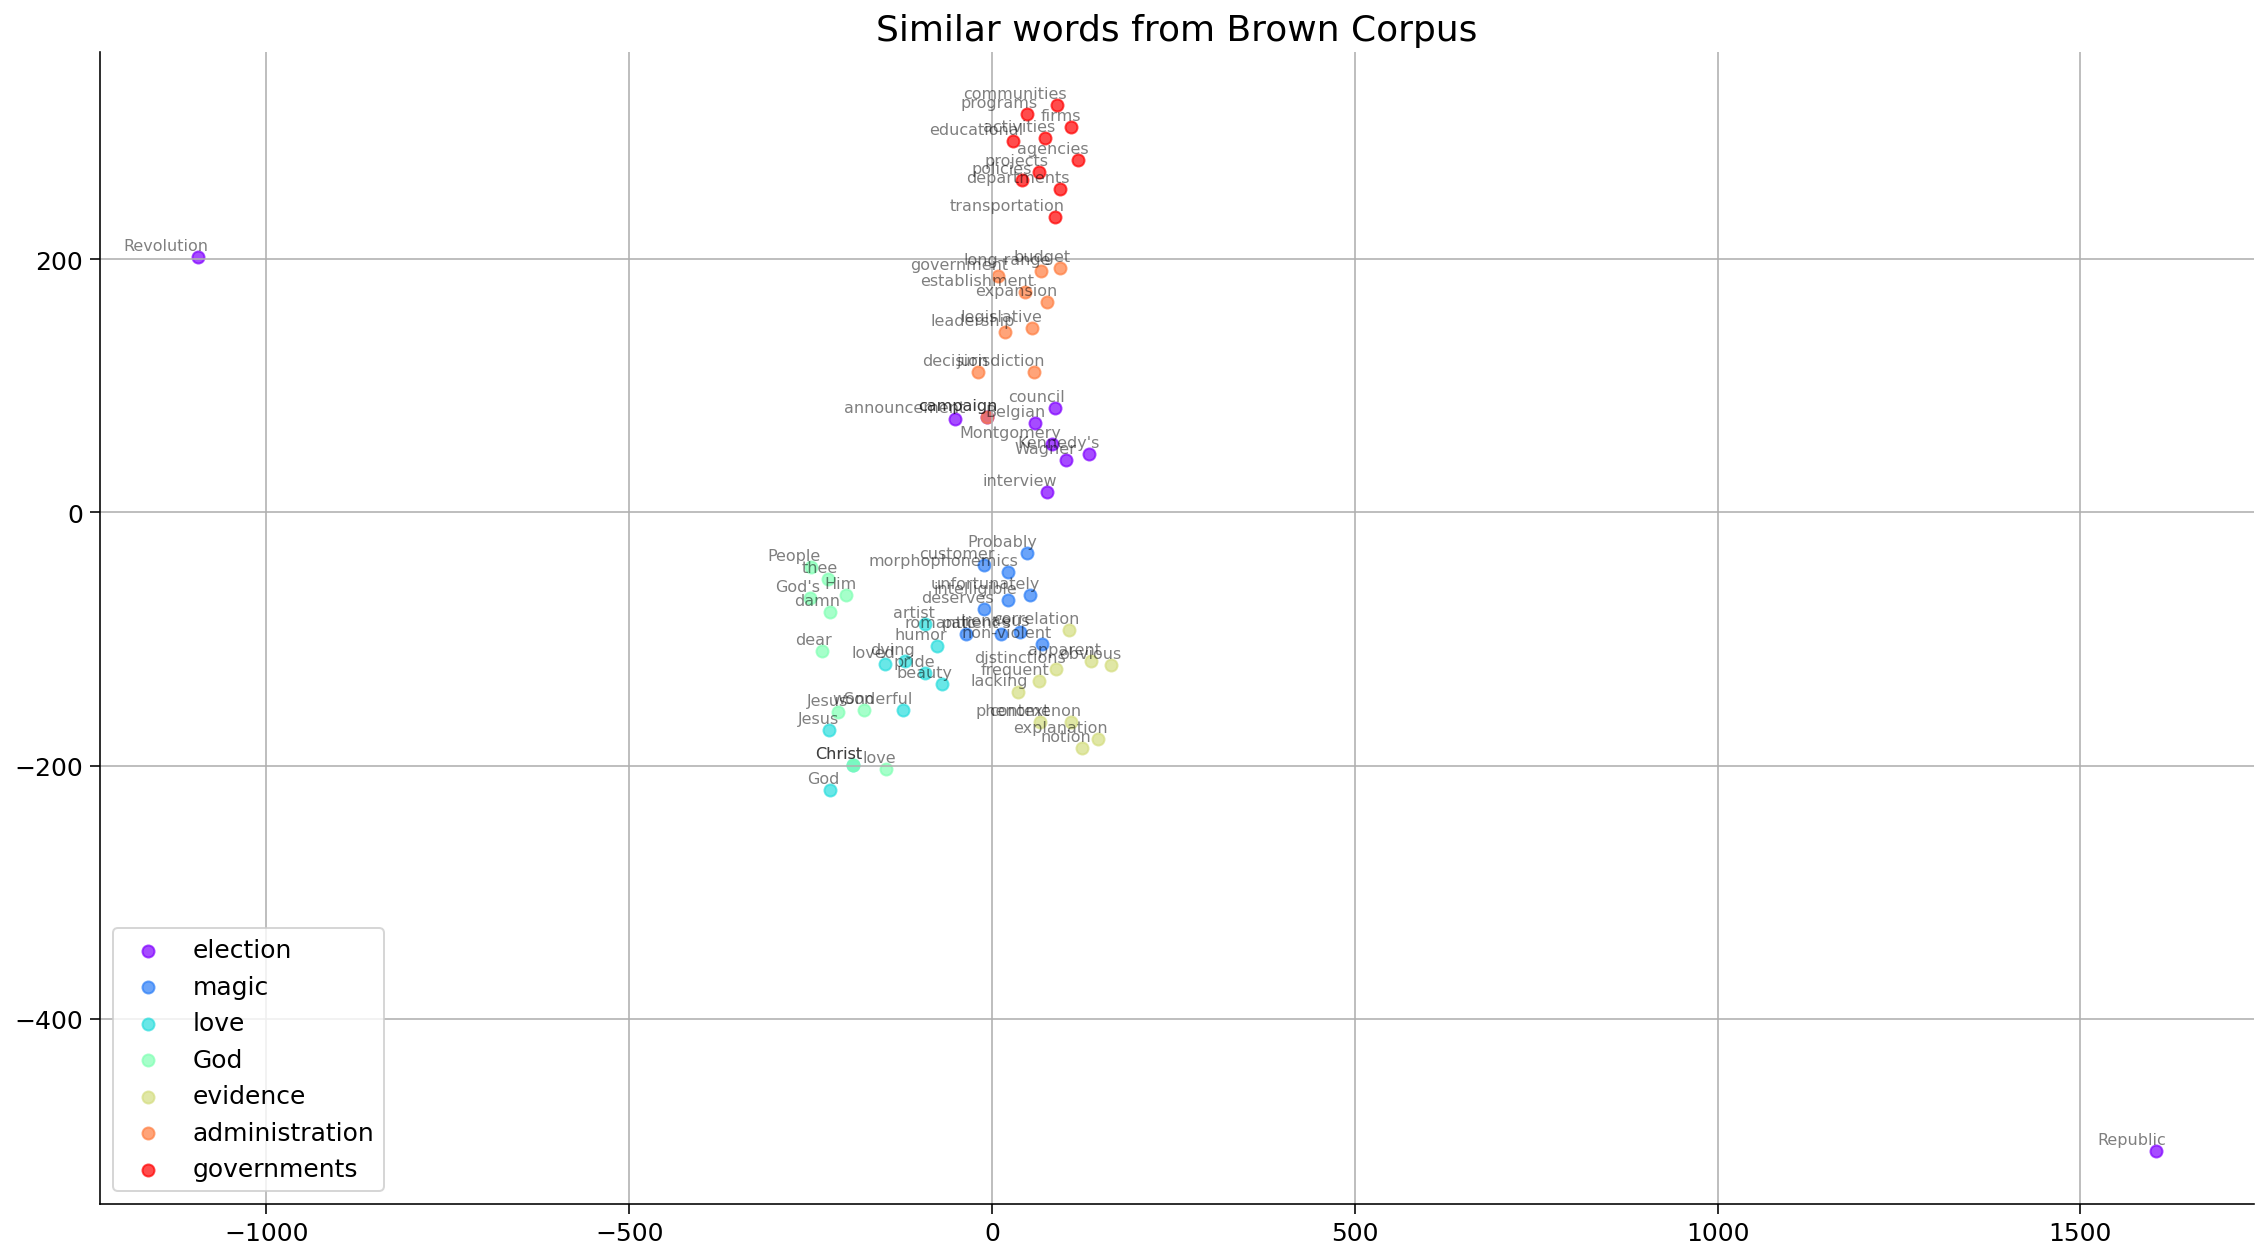

In [24]:
embeddings_en_2d, word_clusters = get_cluster_embeddings(keys)
tsne_plot_similar_words('Similar words from Brown Corpus', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

Analyze the plot and answer the questions below - 


What does having higher similarity between two word embeddings mean?



Why are cluster centers close to some keys but farther from others?



In [25]:
higher_similarity_meaning = 'Higher similarity means that the two words appear in similar contexts very frequently. ' #@param {type:"string"}
cluster_centers = "The clusters are labelled manually whereas Word2Vec assigns embeddings based on context similarity. While 'revolution' and 'republic' are indeed related to the election cluster, they do not appear in similar contexts as the rest of the words in the associated cluster." #@param {type:"string"}

*Estimated time: 70 minutes since start*

---
# Section 5: Recurrent Neural Networks (RNNs)



Video available at https://youtube.com/watch?v=xjAbQQFpojo


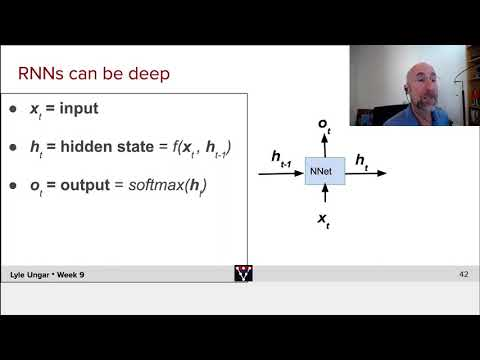

In [26]:
#@title Video: RNN
try: t5;
except NameError: t5=time.time()

video = YouTubeVideo(id="xjAbQQFpojo", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

## Section 5.1: Introduction

Recurrent neural networks, or RNNs , are a family of neural networks for processing sequential data. Just as a convolutional network is specialized for processing a grid of values X such as an image, a recurrent neural network is specialized for processing a sequence of values. RNNs prove useful in many scenarios where other deep learning models are not effective.

* Not all problems can be converted into one with fixed length inputs and outputs.


* The deep learning models we have seen so far pick samples randomly. This might not be the best strategy for a task of understanding meaning from a piece of text. Words in a text occur in a sequence and therefore cannot be permuted randomly to get the meaning. 


A related idea is the use of convolution across a 1-D temporal sequence. The convolution operation allows a network to share parameters across time but is shallow. The output of convolution is a sequence where each output is a function of a small number of neighboring inputs. The idea of parameter sharing manifests in the application of the same convolution kernel at each time step. Recurrent networks share parameters in a diﬀerent way. Each output is a function of the previous hidden layer, always produced using the same model, with the same weights. This recurrent formulation results in the sharing of parameters through a very deep computational graph.



## Section 5.2: Working of a RNN

The following provides more data than the video (but can be skipped for now). For more detail, see the sources, the [deep learning book](https://www.deeplearningbook.org/contents/rnn.html), and [d2l.ai](https://d2l.ai/chapter_recurrent-neural-networks/rnn.html)

When the recurrent network is trained to perform a task that requires predicting the future from the past, the network typically learns to use a hidden state at time step $t$, $H_t$ as a kind of lossy summary of the task-relevant aspects of the past sequence of inputs up to $t$. This summary is in general necessarily lossy, since it maps an arbitrary length sequence $(X_t, X_{t-1}, X_{t-2}, . . . , X_{2}, X_{1})$ to a ﬁxed length vector $H_t$.



We can represent the unfolded recurrence after $t$ steps with a function $G_t$: $$H_t=G_t(X_t, X_{t-1}, X_{t-2}, . . . , X_{2}, X_{1})$$ $$=f(H_{t−1}, X_{t}; \theta)$$


<img width=700 src="https://blog.floydhub.com/content/images/2019/04/rnn-2.gif"> 

The function $g_t$ takes the whole past sequence $(X_t, X_{t-1}, X_{t-2}, . . . , X_{2}, X_{1})$ as input and produces the current state, but the unfolded recurrent structure allows us to factorize $g_t$ into repeated application of a function f. The unfolding process thus introduces two major advantages-

* Regardless of the sequence length, the learned model always has the same input size, because it is speciﬁed in terms of transition from one state to another state, rather than speciﬁed in terms of a variable-length history of states.

* It is possible to use the same transition function $f$ with the same parameters at every time step.


We will now formally write down the equations of a recurrent unit-





Assume that we have a minibatch of inputs $X_t \in R^{nxd}$ at time step $t$ . In other words, for a minibatch of $n$ sequence examples, each row of $X_t$  corresponds to one example at time step $t$ from the sequence. Next, we denote by $H_t \in R^{nxh}$ the hidden variable of time step $t$. Unlike the MLP, here we save the hidden variable $H_{t-1}$ from the previous time step and introduce a new weight parameter $W_{hh} \in R^{hxh}$ to describe how to use the hidden variable of the previous time step in the current time step. Specifically, the calculation of the hidden variable of the current time step is determined by the input of the current time step together with the hidden variable of the previous time step:

$$H_t = \phi(X_t W_{xh} + H_{t-1}W_{hh} + b_h)$$

For time step $t$, the output of the output layer is similar to the computation in the MLP:

$$O_t = H_t W_{hq} + b_q$$
 
Parameters of the RNN include the weights $W_{xh} \in R^{dxh}, W_{hh} \in R^{hxh}$ , and the bias $b_h \in R^{1xh}$ of the hidden layer, together with the weights $W_{hq} \in R^{hxq}$ and the bias $b_q \in R^{1xq}$ of the output layer. It is worth mentioning that even at different time steps, RNNs always use these model parameters. Therefore, the parameterization cost of an RNN does not grow as the number of time steps increases.

<img width=700 align="center" src="https://d2l.ai/_images/rnn.svg">

## Section 5.3: Dataset

We will use the IMDB dataset from <insert link>, which consists of a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. We will use torchtext to download the dataset and prepare it for training, validation and testing. 

We use `fix_length` argument to pad sentences of length less than `sentence_length` or truncate sentences of length greater than `sentence_length`. 

In [27]:
batch_size = 32 

def tokenize(x):
  x = x.split()
  for i in range(len(x)):
    x[i] = x[i].lower().replace('\n', '')
    x[i] = re.sub(r'[^a-z0-9]+', ' ', x[i])
    x[i] = re.sub(r'https?:/\/\S+', ' ', x[i])
    x[i] = x[i].strip()
  return x

def load_dataset(sentence_length = 50):
    TEXT = data.Field(sequential=True, tokenize=tokenize, lower=True,
                      include_lengths=True, batch_first=True, fix_length=sentence_length)
    LABEL = data.LabelField(dtype=torch.float)

    train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

    # If no specific vector embeddings are specified,
    # Torchtext initializes random vector embeddings
    # which would get updated during training through backpropagation.
    TEXT.build_vocab(train_data)
    LABEL.build_vocab(train_data)

    train_data, valid_data = train_data.split(split_ratio=0.7, random_state = random.seed(seed))
    train_iter, valid_iter, test_iter = data.BucketIterator.splits((train_data, valid_data, test_data),
                                                                   batch_size=batch_size, sort_key=lambda x: len(x.text),
                                                                   repeat=False, shuffle=True)
    vocab_size = len(TEXT.vocab)

    return TEXT, vocab_size, train_iter, valid_iter, test_iter

The cell below can take 15-30 secs to run.

In [28]:
TEXT, vocab_size, train_iter, valid_iter, test_iter = load_dataset()

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:07<00:00, 11.5MB/s]


Let's see what the data looks like - 

In [29]:
def text_from_dict(arr, dictionary):
  text = []
  for element in arr:
    text.append(dictionary[element])
  return text

for idx, batch in enumerate(train_iter):
    text = batch.text[0]
    target = batch.label

    for itr in range(25,30):
      print('Review: ', ' '.join(text_from_dict(text[itr], TEXT.vocab.itos)))
      print('Label: ', int(target[itr].item()), '\n')
   
    print('[0: Negative Review, 1: Positive Review]')
    if idx==0:
      break

Review:  antitrust falls right into that category of films that aspire to make some great point while being uplifting yet falls completely flat i don t hate the film but it is missing key elements such as suspense there have been other attempts to make an engaging film about computers such as
Label:  0 

Review:  i loved this series when it was on kids wb i didn t believe that there was a batman spin off seeing as the original show ended in 1995 and this show came in 1997 first of all i loved the idea of robin leaving batman to solve crime on his
Label:  1 

Review:  my daughter gets really put out at me when i refer to drew barrymore as looking as if she d been hit in the face with a frying pan not to mention her dudley dooright chin that jay leno would die for how wonderful then when i discovered in fever pitch
Label:  1 

Review:  zero day leads you to think even re think why two boys young men would do what they did  commit mutual suicide via slaughtering their classmates it captur

## Section 5.4: 1D CNN

Before we jump into RNNs we will create a CNN model for the text classification task. Let us understand how a one-dimensional convolutional layer works-

<img width=700 src=https://d2l.ai/_images/conv1d.svg>

One-dimensional cross-correlation operation. The shaded parts are the first output element as well as the input and kernel array elements used in its calculation:  0×1+1×2=2 .

<img width=700 src=https://d2l.ai/_images/conv1d-channel.svg>

One-dimensional cross-correlation operation with three input channels. The shaded parts are the first output element as well as the input and kernel array elements used in its calculation:  0×1+1×2+1×3+2×4+2×(−1)+3×(−3)=2 .

Similarly, we have a one-dimensional pooling layer. The max-over-time pooling layer used in CNN actually corresponds to a one-dimensional global maximum pooling layer. Assuming that the input contains multiple channels, and each channel consists of values on different time steps, the output of each channel will be the largest value of all time steps in the channel. Therefore, the input of the max-over-time pooling layer can have different time steps on each channel.

Fitting all the pieces together a 1D CNN architecture looks like the image below - 

<img width=700 src=https://d2l.ai/_images/textcnn.svg>

 

### Exercise 1

Now it's your turn to implement a 1D CNN. 
* The 1D CNN should work for any number kernel size and corresponsing number of channels. Both `kernel_sizes` and `num_channels` are lists. 

* Use a dropout of 0.5

* Use [average pooling](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool1d.html)

* Here we will use `nn.Embedding` layer instead of pretrained word embeddings. This is a design choice. Using `nn.Embedding` layer in the network allows us to train word embeddings specific to the problem at hand. 

In [30]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_size, kernel_sizes, num_channels,
                 **kwargs):
        super(TextCNN, self).__init__(**kwargs)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(sum(num_channels), 2)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.relu = nn.ReLU()
        self.convs = nn.ModuleList()
        for c, k in zip(num_channels, kernel_sizes):
            self.convs.append(nn.Conv1d(embed_size, c, k))

    def forward(self, inputs):
        embeddings = self.embedding(inputs)
        embeddings = embeddings.permute(0, 2, 1)
        encoding = torch.cat([
            torch.squeeze(self.relu(self.pool(conv(embeddings))), dim=-1)
            for conv in self.convs], dim=1)
        outputs = self.fc(self.dropout(encoding))
        return outputs

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/W9_Tutorial1_Solution_Ex01.py)


In [31]:
def train(model, device, train_iter, valid_iter, epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    train_loss, validation_loss = [], []
    train_acc, validation_acc = [], []

    for epoch in range(epochs):
      #train
      model.train()
      running_loss = 0.
      correct, total = 0, 0 
      steps = 0

      for idx, batch in enumerate(train_iter):
        text = batch.text[0]
        # print(type(text), text.shape)
        target = batch.label
        target = torch.autograd.Variable(target).long()
        text, target = text.to(device), target.to(device)

        # add micro for coding training loop
        optimizer.zero_grad()
        output = model(text)
 
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        steps += 1
        running_loss += loss.item()

        # get accuracy 
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        # if steps % 100 == 0:
        #     print (f'Epoch: {epoch+1}, Idx: {idx+1}, Training Loss: {loss.item():.4f}, Training Accuracy: {100*(predicted == target).sum().item()/len(batch): .2f}%')

      train_loss.append(running_loss/len(train_iter))
      train_acc.append(correct/total)

      print(f'Epoch: {epoch + 1},  Training Loss: {running_loss/len(train_iter):.4f}, Training Accuracy: {100*correct/total: .2f}%')

      # evaluate on validation data
      model.eval()
      running_loss = 0.
      correct, total = 0, 0 

      with torch.no_grad():
        for idx, batch in enumerate(valid_iter):
            text = batch.text[0]
            target = batch.label
            target = torch.autograd.Variable(target).long()
            text, target = text.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(text)
    
            loss = criterion(output, target)
            running_loss += loss.item()

            # get accuracy 
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

      validation_loss.append(running_loss/len(valid_iter))
      validation_acc.append(correct/total)

      print (f'Validation Loss: {running_loss/len(valid_iter):.4f}, Validation Accuracy: {100*correct/total: .2f}%')
  
    return train_loss, train_acc, validation_loss, validation_acc

In [32]:
def test(model,  device, test_iter):
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
    for idx, batch in enumerate(test_iter):
        text = batch.text[0]
        target = batch.label
        target = torch.autograd.Variable(target).long()
        text, target = text.to(device), target.to(device)

        outputs = model(text)
        _, predicted = torch.max(outputs, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    acc = 100 * correct / total
    return acc

In [33]:
# helpers
def plot_train_val(x, train, val, train_label, val_label, title):
  plt.plot(x, train, label=train_label)
  plt.plot(x, val, label=val_label)
  plt.legend(loc='lower right')
  plt.xlabel('epoch')
  plt.title(title)
  plt.show()

def count_parameters(model):
    parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return parameters

def init_weights(m):
    if type(m) in (nn.Linear, nn.Conv1d):
        nn.init.xavier_uniform_(m.weight)
           
# print(f'The model has {count_parameters(model):,} trainable parameters')

In [34]:
learning_rate = 0.00001
embedding_length = 100
kernel_sizes = [3, 4, 5]
nums_channels = [100, 100, 100]
epochs = 10

cnn_model = TextCNN(vocab_size, embedding_length, kernel_sizes, nums_channels)
cnn_model.to(device)
cnn_model.apply(init_weights)
cnn_start_time = time.time()
cnn_train_loss, cnn_train_acc, cnn_validation_loss, cnn_validation_acc = train(cnn_model, device, train_iter, valid_iter, epochs, learning_rate)
print("--- Time taken to train = %s seconds ---" % (time.time() - cnn_start_time))
test_accuracy = test(cnn_model, device, test_iter)
print('Test Accuracy: ',  test_accuracy, '%')


Epoch: 1,  Training Loss: 0.7044, Training Accuracy:  50.70%
Validation Loss: 0.6887, Validation Accuracy:  53.80%
Epoch: 2,  Training Loss: 0.6933, Training Accuracy:  53.87%
Validation Loss: 0.6826, Validation Accuracy:  55.99%
Epoch: 3,  Training Loss: 0.6894, Training Accuracy:  54.11%
Validation Loss: 0.6780, Validation Accuracy:  57.32%
Epoch: 4,  Training Loss: 0.6836, Training Accuracy:  55.70%
Validation Loss: 0.6744, Validation Accuracy:  58.63%
Epoch: 5,  Training Loss: 0.6820, Training Accuracy:  56.39%
Validation Loss: 0.6714, Validation Accuracy:  59.44%
Epoch: 6,  Training Loss: 0.6770, Training Accuracy:  57.29%
Validation Loss: 0.6687, Validation Accuracy:  59.79%
Epoch: 7,  Training Loss: 0.6737, Training Accuracy:  57.99%
Validation Loss: 0.6664, Validation Accuracy:  60.03%
Epoch: 8,  Training Loss: 0.6717, Training Accuracy:  58.31%
Validation Loss: 0.6642, Validation Accuracy:  60.83%
Epoch: 9,  Training Loss: 0.6685, Training Accuracy:  58.95%
Validation Loss: 0.

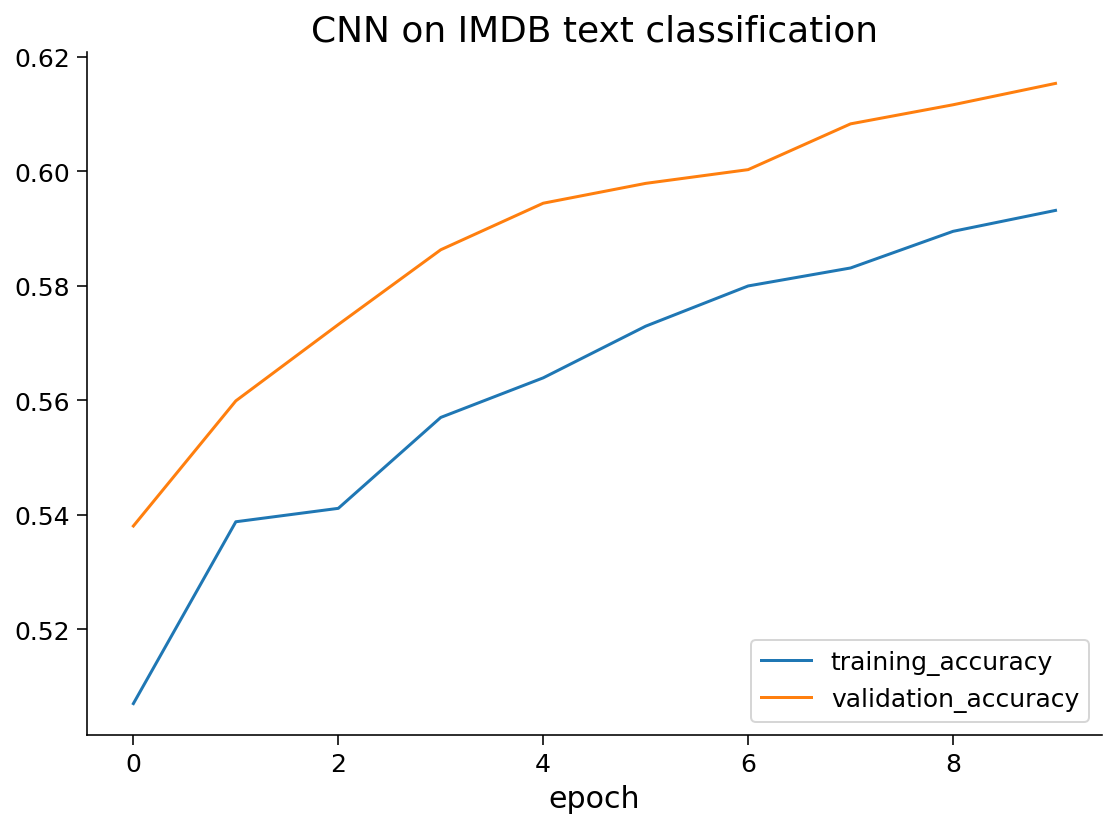

In [35]:
plot_train_val(np.arange(0,epochs), cnn_train_acc, cnn_validation_acc, 'training_accuracy', 'validation_accuracy', 'CNN on IMDB text classification')

*Example output:*  

<img alt='Solution hint 1' align='left' width=600 height=400 src=https://raw.githubusercontent.com/CIS-522/course-content/main/tutorials/W9_RNN/static/W9_Tutorial1_Solution_Ex01.png />

In [36]:
paramters = count_parameters(cnn_model)
print('Number of parameters = ',  paramters)

Number of parameters =  12690402


What features does 1D CNN learn?

In [37]:
conv1D_features = "The 1D CNN learns what groups of 3, 4 and 5 words 'look' like in a sentence." #@param {type:"string"}

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/conv1D_features.md)


*Estimated time: 95 minutes since start*

## Section 5.5: Vanilla RNN

### Exercise 2

Now it's your turn to write a Vanilla RNN using PyTorch.

* Use a dropout of 0.5

* Add 2 RNN layers. This would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.

* Once again we will use nn.Embedding.

In [38]:
class VanillaRNN(nn.Module):
  def __init__(self, batch_size, output_size, hidden_size, vocab_size, embedding_length):
    super(VanillaRNN, self).__init__()

    self.batch_size = batch_size
    self.output_size = output_size
    self.hidden_size = hidden_size
    self.vocab_size = vocab_size
    self.embedding_length = embedding_length

    self.word_embeddings = nn.Embedding(vocab_size, embedding_length)
    self.dropout = nn.Dropout(0.5)
    self.rnn = nn.RNN(embedding_length, hidden_size, num_layers=2)
    self.fc = nn.Linear(2*hidden_size, output_size)

  def forward(self, inputs):
    input = self.word_embeddings(inputs)
    input = input.permute(1, 0, 2)
    h_0 =  Variable(torch.zeros(2, input.size()[1], self.hidden_size).to(device)) 
    input = self.dropout(input)
    output, h_n = self.rnn(input, h_0)
    h_n = h_n.permute(1, 0, 2) 
    h_n = h_n.contiguous().view(h_n.size()[0], h_n.size()[1]*h_n.size()[2])
    logits = self.fc(h_n)
    
    return logits

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/W9_Tutorial1_Solution_Ex02.py)


In [41]:
# Vanilla RNN
learning_rate = 0.0002
batch_size = 32
output_size = 2
hidden_size = 50
embedding_length = 100
epochs = 10
vanilla_rnn_model = VanillaRNN(batch_size, output_size, hidden_size, vocab_size, embedding_length)
vanilla_rnn_model.to(device)

vanilla_rnn_start_time = time.time()
vanilla_train_loss, vanilla_train_acc, vanilla_validation_loss, vanilla_validation_acc = train(vanilla_rnn_model, device, train_iter, valid_iter, epochs, learning_rate)
print("--- Time taken to train = %s seconds ---" % (time.time() - vanilla_rnn_start_time))
test_accuracy = test(vanilla_rnn_model, device, test_iter)
print('Test Accuracy: ',  test_accuracy, '%')

Epoch: 1,  Training Loss: 0.7045, Training Accuracy:  50.46%
Validation Loss: 0.6963, Validation Accuracy:  50.17%
Epoch: 2,  Training Loss: 0.6940, Training Accuracy:  51.71%
Validation Loss: 0.6943, Validation Accuracy:  50.83%
Epoch: 3,  Training Loss: 0.6909, Training Accuracy:  52.94%
Validation Loss: 0.6940, Validation Accuracy:  51.80%
Epoch: 4,  Training Loss: 0.6888, Training Accuracy:  54.22%
Validation Loss: 0.6943, Validation Accuracy:  51.89%
Epoch: 5,  Training Loss: 0.6826, Training Accuracy:  55.78%
Validation Loss: 0.6729, Validation Accuracy:  59.08%
Epoch: 6,  Training Loss: 0.6750, Training Accuracy:  58.31%
Validation Loss: 0.6624, Validation Accuracy:  61.87%
Epoch: 7,  Training Loss: 0.6658, Training Accuracy:  60.27%
Validation Loss: 0.6637, Validation Accuracy:  61.57%
Epoch: 8,  Training Loss: 0.6610, Training Accuracy:  60.90%
Validation Loss: 0.6455, Validation Accuracy:  64.21%
Epoch: 9,  Training Loss: 0.6534, Training Accuracy:  62.14%
Validation Loss: 0.

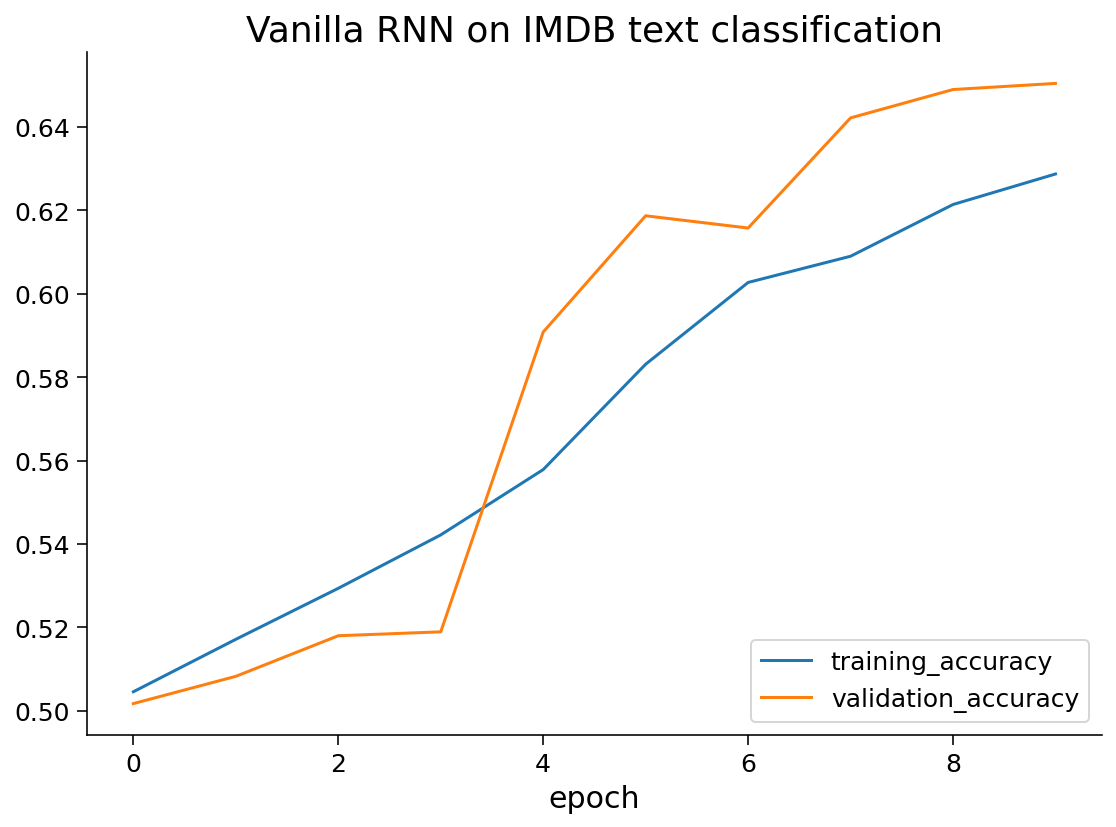

In [42]:
plot_train_val(np.arange(0,epochs), vanilla_train_acc, vanilla_validation_acc,
               'training_accuracy', 'validation_accuracy', 'Vanilla RNN on IMDB text classification')

*Example output:*  

<img alt='Solution hint 2' align='left' width=600 height=400 src=https://raw.githubusercontent.com/CIS-522/course-content/main/tutorials/W9_RNN/static/W9_Tutorial1_Solution_Ex02.png />

In [43]:
paramters = count_parameters(vanilla_rnn_model)
print('Number of parameters = ',  paramters)

Number of parameters =  12582402



 If we use one hot encoding instead of embedding, how many parameters woud the RNN model have?

In [45]:
one_hot_parameters = 'The input size to the RNN layer changes from being the embedding length to be the length of the vocabulary. ' #@param {type:"string"} 

Based on exercises above would you say CNNs are faster than RNNs? Why?

In [44]:
cnn_vs_rnn_speed = 'CNNs are about twice as fast as RNNs for the task being considered here. This makes sense since they can finish training in parallel and do not rely on backpropagating errors over time.' #@param {type:  "string"}

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/cnn_vs_rnn_speed.md)

Why might it be a good idea to pad/truncate the text here to make them  all the same length, which an RNN can handle arbitrary lengths?

In [51]:
why_pad = 'To keep the number of parameters as small as possible.' #@param {type:"string"}


## Section 5.6: Input Length

Now let's increase the `sentence_length` to see how RNN performs when long reviews are allowed.


In [46]:
TEXT_long, vocab_size_long, train_iter_long, valid_iter_long, test_iter_long = load_dataset(200)

The cell below will take 2-3 minutes to run.

In [47]:
# Vanilla RNN
learning_rate = 0.00001
batch_size = 32
output_size = 2
hidden_size = 100
embedding_length = 100
epochs = 10
vanilla_rnn_model_long = VanillaRNN(batch_size, output_size, hidden_size, vocab_size_long, embedding_length)
vanilla_rnn_model_long.to(device)

vanilla_rnn_start_time_long = time.time()
vanilla_train_loss_long, vanilla_train_acc_long, vanilla_validation_loss_long, vanilla_validation_acc_long = train(vanilla_rnn_model_long, device, train_iter_long, valid_iter_long, epochs, learning_rate)
print("--- Time taken to train = %s seconds ---" % (time.time() - vanilla_rnn_start_time_long))
test_accuracy = test(vanilla_rnn_model_long, device, test_iter_long)
print('Test Accuracy: ',  test_accuracy, '%')

Epoch: 1,  Training Loss: 0.7066, Training Accuracy:  49.95%
Validation Loss: 0.6968, Validation Accuracy:  51.08%
Epoch: 2,  Training Loss: 0.7014, Training Accuracy:  50.45%
Validation Loss: 0.6963, Validation Accuracy:  50.91%
Epoch: 3,  Training Loss: 0.6998, Training Accuracy:  50.93%
Validation Loss: 0.6958, Validation Accuracy:  50.80%
Epoch: 4,  Training Loss: 0.6996, Training Accuracy:  50.19%
Validation Loss: 0.6953, Validation Accuracy:  50.67%
Epoch: 5,  Training Loss: 0.6969, Training Accuracy:  50.72%
Validation Loss: 0.6950, Validation Accuracy:  50.80%
Epoch: 6,  Training Loss: 0.6969, Training Accuracy:  50.47%
Validation Loss: 0.6949, Validation Accuracy:  50.69%
Epoch: 7,  Training Loss: 0.6960, Training Accuracy:  50.02%
Validation Loss: 0.6947, Validation Accuracy:  50.63%
Epoch: 8,  Training Loss: 0.6950, Training Accuracy:  51.07%
Validation Loss: 0.6946, Validation Accuracy:  50.53%
Epoch: 9,  Training Loss: 0.6955, Training Accuracy:  50.92%
Validation Loss: 0.

In [48]:
paramters = count_parameters(vanilla_rnn_model_long)
print('Number of parameters = ',  paramters)

Number of parameters =  12610302


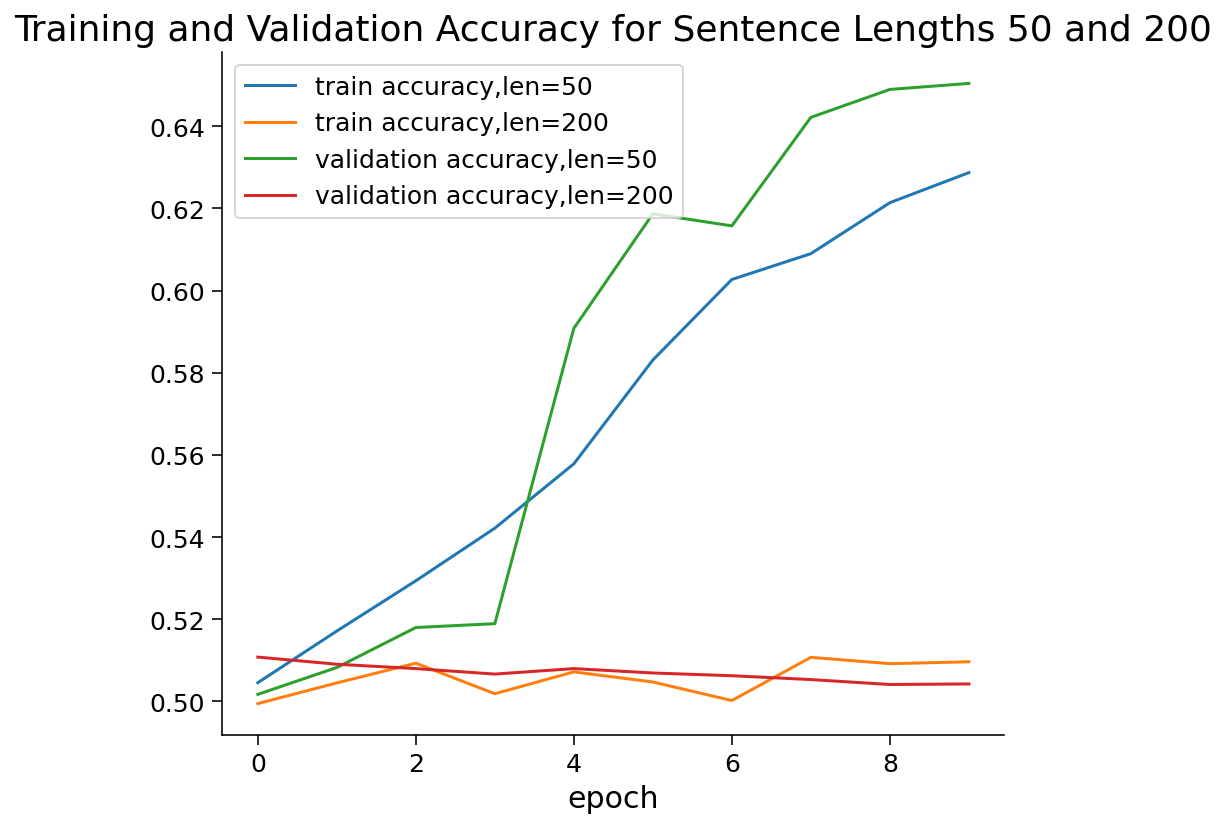

In [49]:
# comparison
x_ticks = np.arange(epochs)
plt.plot(x_ticks, vanilla_train_acc, label='train accuracy,len=50')
plt.plot(x_ticks, vanilla_train_acc_long, label='train accuracy,len=200')

plt.plot(x_ticks, vanilla_validation_acc, label='validation accuracy,len=50')
plt.plot(x_ticks, vanilla_validation_acc_long, label='validation accuracy,len=200')

plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.title("Training and Validation Accuracy for Sentence Lengths 50 and 200")
plt.show()

Compare the performance of Vanilla RNN for the different sentence lenghts and answer the questions below.

Compared to sentence length of 50,  when using sentence length 200-

In [50]:
training_time_200 = 'increases' #@param ["increases", "decreases", "remains same"] {allow-input: true}
training_accuracy_200 = 'increases' #@param ["increases", "decreases", "remains same"] {allow-input: true}
test_accuracy_200 = 'increases' #@param ["increases", "decreases", "remains same"] {allow-input: true}
no_of_parameters_200 = 'increases' #@param ["increases", "decreases", "remains same"] {allow-input: true}

*Estimated time: 120 minutes since start*

## Section 5.7: Architectures 

RNN models are mostly used in the fields of natural language processing and speech recognition. Below are types of RNNs. Depending on which outputs we use, RNN can be used for variety of tasks. The text classification problem we solved was an instance of the many to one architecture. Write down the applications of other architectures. 

<img width=900 src="https://blog.floydhub.com/content/images/2019/04/karpathy.jpeg">

In [52]:
one_to_one = 'Standard FFN' #@param {type:"string"}

one_to_many = 'Hierarchical classification' #@param {type:"string"}

many_to_one = 'Sequence classification' #@param {type:"string"}

many_to_many1 = 'Translation' #@param {type:"string"}

many_to_many2 = 'Translation' #@param {type:"string"}

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/architectures_comparison.md)

---
# Section 6: Vanishing and Exploding Gradients


Video available at https://youtube.com/watch?v=O5fB4I50FpU


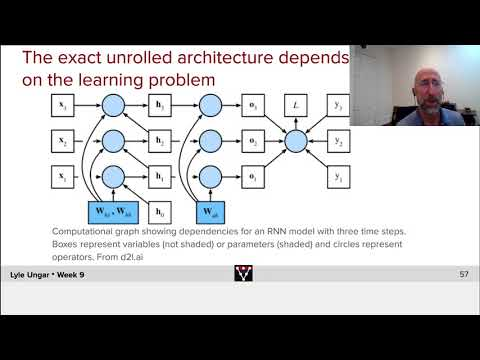

In [53]:
#@title Video: Backpropagation in RNNs
try: t6;
except NameError: t6=time.time()

video = YouTubeVideo(id="O5fB4I50FpU", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

video

Problems with RNNs:

* Vanishing gradients-
In a long sequence, the gradients get multiplied by the weight matrix (transpose) at every time step. If there are small values in the weight matrix, the norm of gradients get smaller and smaller exponentially.
* Exploding gradients-
If we have a large weight matrix and the non-linearity in the recurrent layer is not saturating, the gradients will explode. The weights will diverge at the update step. We may have to use a tiny learning rate for the gradient descent to work.
One reason to use RNNs is for the advantage of remembering information in the past. However, it could fail to memorize the information long ago in a simple RNN without tricks.

An example that has vanishing gradient problem:

The input is the characters from a C Program. The system will tell whether it is a syntactically correct program. A syntactically correct program should have a valid number of braces and parentheses. Thus, the network should remember how many open parentheses and braces there are to check, and whether we have closed them all. The network has to store such information in hidden states like a counter. However, because of vanishing gradients, it will fail to preserve such information in a long program.

Can you think of some other disadvantages of vanilla RNN?

In [54]:
rnn_disadvantage = 'May be slower to train than a CNN.' #@param {type: "string"}

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/rnn_disadvantage.md)

## Section 6.1: Gradient Clipping

While analyzing sequences through RNNs, we compute the gradients over a number of time steps iteratively, which results in a chain of matrix-products with length during backpropagation. This is likely to result in numerical instability; the gradients may either explode or vanish. To avoid these situations, RNN models often need extra help to stabilize the training.

Sometimes the gradients can be quite large and the optimization algorithm may fail to converge. We could address this by reducing the learning rate. But what if we only rarely get large gradients? 

One popular alternative is to clip the gradient $g$  by projecting them back to a ball of a given radius, say $\theta$ via

$$g := min \left[1, \frac{\theta}{∥g∥}\right] . g $$

The advantages of gradient clipping: 
- The gradient norm never exceeds the value $\theta$ and that the updated gradient is entirely aligned with the original direction of $g$. 
- The influence of any given minibatch (and within it any given sample) exerted on the parameter vector is limited; which provides the model with robustness. 

### Exercise 3
Using the intuition above, write a function to perform gradient clipping, given a network and the value of $\theta$.  

In [55]:
def grad_clipping(net, theta):  
    """Clip the gradient."""
    params = [p for p in net.parameters() if p.requires_grad]

    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/W9_Tutorial1_Solution_Ex03.py)



Besides gradient clipping, can you think of any other methods to cope with gradient explosion in recurrent neural networks?

In [56]:
grad_clipping_alternative = 'Using a tanh function as the nonlinearity instead of a ReLU.' #@param {type: "string"}

[*Click for solution*](https://github.com/CIS-522/course-content/blob/main/tutorials/W9_RNN/solutions/grad_clipping_alternative.md)


*Estimated time: 130 minutes since start*

---
# Wrap up


In [57]:
#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**

import time
import numpy as np
import urllib.parse
from IPython.display import IFrame
def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefill_fields = {}
  for key in fields:
      new_key = 'prefill_' + key
      prefill_fields[new_key] = fields[key]
  prefills = urllib.parse.urlencode(prefill_fields)
  src = src + prefills
  return src


#autofill time if it is not present
try: t0;
except NameError: t0 = time.time()
try: t1;
except NameError: t1 = time.time()
try: t2;
except NameError: t2 = time.time()
try: t3;
except NameError: t3 = time.time()
try: t4;
except NameError: t4 = time.time()
try: t5;
except NameError: t5 = time.time()
try: t6;
except NameError: t6 = time.time()
try: t7;
except NameError: t7 = time.time()

# autofill fields if they are not present
# a missing pennkey and pod will result in an Airtable warning
# which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: learning_from_previous_week;
except NameError: learning_from_previous_week = "" 
try: where_RNNs_fail;
except NameError: where_RNNs_fail = ""
try: alternate_long_term_memory;
except NameError: alternate_long_term_memory = ""
try: why_RNNs;
except NameError: why_RNNs = ""
try: why_not_RNNs;
except NameError: why_not_RNNs = ""
try: creating_stationarity;
except NameError: creating_stationarity = ""
try: word_embedding_meaning;
except NameError: word_embedding_meaning = ""
try: higher_similarity_meaning;
except NameError: higher_similarity_meaning = ""
try: cluster_centers;
except NameError: cluster_centers = ""
try: conv1D_features;
except NameError: conv1D_features = ""
try: one_hot_parameters;
except NameError: one_hot_parameters = ""
try: cnn_vs_rnn_speed;
except NameError: cnn_vs_rnn_speed = ""
try: why_pad;
except NameError: why_pad = ""
try: training_time_200;
except NameError: training_time_200 = ""
try: training_accuracy_200;
except NameError: training_accuracy_200 = ""
try: test_accuracy_200;
except NameError: test_accuracy_200 = ""
try: no_of_parameters_200;
except NameError: no_of_parameters_200 = ""
try: one_to_one;
except NameError: one_to_one = ""
try: one_to_many;
except NameError: one_to_many = ""
try: many_to_one;
except NameError: many_to_one = ""
try: many_to_many1;
except NameError: many_to_many1 = ""
try: many_to_many2;
except NameError: many_to_many2 = ""
try: rnn_disadvantage;
except NameError: rnn_disadvantage = ""
try: grad_clipping_alternative;
except NameError: grad_clipping_alternative = ""

times = np.array([t1,t2,t3,t4,t5,t6,t7])-t0

fields = {
    "my_pennkey": my_pennkey,
    "my_pod": my_pod, 
    "learning_from_previous_week": learning_from_previous_week,
    "word_embedding_meaning": word_embedding_meaning,
    "higher_similarity_meaning": higher_similarity_meaning,
    "cluster_centers": cluster_centers,
    "conv1D_features": conv1D_features,
    "one_hot_parameters": one_hot_parameters,
    "cnn_vs_rnn_speed": cnn_vs_rnn_speed,
    "training_time_200": training_time_200,
    "training_accuracy_200": training_accuracy_200,
    "test_accuracy_200": test_accuracy_200,
    "no_of_parameters_200": no_of_parameters_200,
    "one_to_one": one_to_one,
    "one_to_many": one_to_many,
    "many_to_one": many_to_one,
    "many_to_many1": many_to_many1,
    "many_to_many2": many_to_many2,
    "rnn_disadvantage": rnn_disadvantage,
    "grad_clipping_alternative": grad_clipping_alternative,
    "where_RNNs_fail": where_RNNs_fail,
    "alternate_long_term_memory":alternate_long_term_memory,
    "why_RNNs":why_RNNs,
    "why_not_RNNs":why_not_RNNs,
    "creating_stationarity":creating_stationarity,
    "why_pad":why_pad,
    "cumulative_times": times
}

src = "https://airtable.com/embed/shrg2wXP3HvUi60OD?"

display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))


## Feedback
How could this session have been better? How happy are you in your group? How do you feel right now?

Feel free to use the embeded form below or use this link:
<a target="_blank" rel="noopener noreferrer" href="https://airtable.com/shrNSJ5ECXhNhsYss">https://airtable.com/shrNSJ5ECXhNhsYss</a>

In [58]:
display(IFrame(src="https://airtable.com/embed/shrNSJ5ECXhNhsYss?backgroundColor=red", width = 800, height = 400))